<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/K_MEANclustering3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class kmeans:
  def __init__(self,k,input):
    self.k=k
    self.df=input
    self.C=None
  
  # k개의 중심값을 임의로 선택한다
  def centroids(self):
    import random
    C={
    i:[data for data in self.df.values[i]]
    for i,j in zip(range(self.k),random.sample(range(len(self.df)),self.k))} 
    return C
  
  # 각 중심에서 데이터까지의 거리를 계산 using np.linalg.norm
  # 각 데이터에 가장 가까운 중심점(군집)을 할당
  def classify(self,C):
    import copy
    clsuter_df=copy.deepcopy(self.df)
    col_n=clsuter_df.shape[1]
    for i in C.keys():
      clsuter_df["Distance_from_{}".format(i)]\
      =np.linalg.norm(np.array(clsuter_df)[:,:col_n]-C[i],axis=1)
    dist_cols=["Distance_from_{}".format(i) for i in C.keys()]
    clsuter_df["Closet_Cluster"]=clsuter_df.loc[:,dist_cols].idxmin(axis=1).map(lambda x:int(x.lstrip("Distance_from_")))
    return clsuter_df
  
  # 각 중심점에 선택된 데이터 포인터들의 평균위치로 중심점을 재이동
  def update(self,C):
    c_df=self.classify(C)
    self.C={
    i:[c for c in np.mean(self.df[c_df["Closet_Cluster"]==i],axis=0)]
      for i in c_df["Closet_Cluster"].unique()}
    return self.C

  # 위 과정을 '갱신된 중심점이 거의 변화가 없어 할당된 군집이 바뀌지 않을만큼' 반복
  def train_cluster(self):
    assignments=None
    C=self.centroids()
    while True:
      # 중심점에 해당되는 군집 찾기
      cluster_df=self.classify(C)
      new_assignments=list(self.classify(C)["Closet_Cluster"])
      # 새로운 중심점 찾기
      new_C=self.update(C)
      # '할당된 군집'이 바뀌지 않을 만큼 중심점이 수렴했다면 종료
      if assignments==new_assignments:
        break
      # 아니라면 다시 중심점과 군집 찾기
      assignments=new_assignments
      C=new_C
    return new_C, np.array(new_assignments), cluster_df
    

In [ ]:
#test_data
group=pd.read_csv("https://raw.githubusercontent.com/jhcool1988/teamdata/master/2019stats.csv",header=0)
group

,R,Player,Name,Club,Age,Main position,Apps,Mins,Goals,Assists,Shot per Game,Key Pass,Drb,Fouled,Rating
0,1,Lionel Messi,Messi,Barcelona,32,FW,21,1891,19,12,4.8,2.5,5.4,1.7,8.61
1,2,Neymar,Neymar,Paris Saint-Germain,28,FW,15,1322,13,6,4.7,2.6,6.0,4.1,8.58
2,3,Robert Lewandowski,Lewandowski,Bayern Munich,31,FW,23,2042,25,3,4.7,1.2,2.1,1.5,8.16
3,4,Kylian Mbappé,Mbappé,Paris Saint-Germain,21,FW,17,1516,18,5,4.4,2.0,2.8,1.1,8.14
4,5,Josip Ilicic,Ilicic,Atalanta,32,FW,19,1492,15,5,3.6,2.5,2.6,2.4,7.95
5,6,Kevin De Bruyne,De Bruyne,Manchester City,28,FW,25,2156,8,16,2.9,3.7,1.4,0.7,7.92
6,7,Cristiano Ronaldo,Ronaldo,Juventus,35,FW,22,1945,21,3,5.9,1.7,1.8,1.9,7.90
7,8,Jadon Sancho,Sancho,Borussia Dortmund,20,FW,21,1807,14,15,2.0,2.3,2.6,0.6,7.90
8,9,Ángel Di María,Di María,Paris Saint-Germain,32,FW,23,2005,8,14,2.8,3.0,2.6,0.8,7.75
9,10,Dimitri Payet,Payet,Marseille,33,FW,22,1937,9,4,2.9,4.0,2.3,1.4,7.73


In [ ]:
group=group[["Goals", "Assists", "Drb"]]
group.head()

,Goals,Assists,Drb
0,19,12,5.4
1,13,6,6.0
2,25,3,2.1
3,18,5,2.8
4,15,5,2.6


In [ ]:
# sklearn library
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4, init="k-means++").fit(group)

In [ ]:
model.cluster_centers_ # 중심점 using sklearn

array([[ 6.36363636, 11.72727273,  1.99090909],
       [20.75      ,  5.375     ,  2.0625    ],
       [ 4.17647059,  2.76470588,  1.98823529],
       [12.21428571,  5.42857143,  1.92857143]])

In [ ]:
def ssd(input, n_k):# sum_of_squared_distance
  dist_list=[]
  for i in range(1,n_k+1):
    fit=kmeans(i,input)
    C=fit.train_cluster()[0]
    C_df=fit.classify(C)
    dist=[np.sum(C_df.loc[C_df["Closet_Cluster"]==j,"Distance_from_{}".format(j)]**2)
    for j in [c for c in C.keys()]]
    dist_list.append(np.sum(dist))
  return dist_list,range(1,n_k+1)

def elbow(x,n_k): # sum_of_squared_distance using sklearn
  sse=[]
  for i in range(1,n_k+1):
    km=KMeans(n_clusters=i,init="k-means++").fit(x)
    sse.append(km.inertia_)
  return sse, range(1,n_k+1)


In [ ]:
def wcss(input,k):
  Info=ssd(input,k)
  plt.plot(Info[1],Info[0],marker="o",color="c")
  plt.xticks(Info[1])
  plt.xlabel("K")
  plt.ylabel("Total Squared Error")
  plt.title("Within #Cluster sum of squares")
  plt.show()

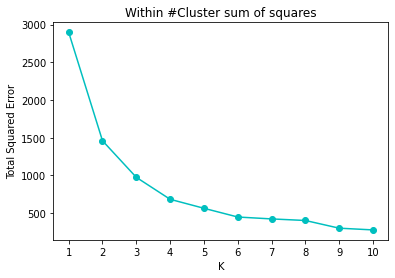

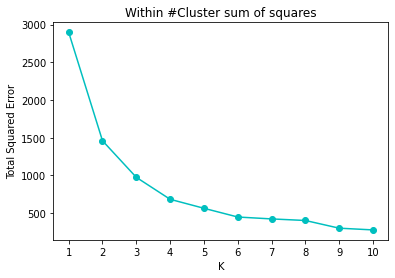

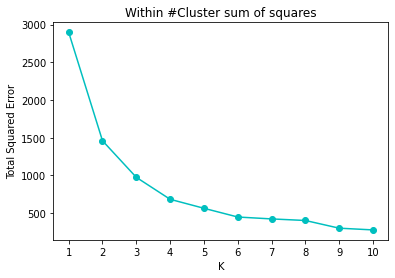

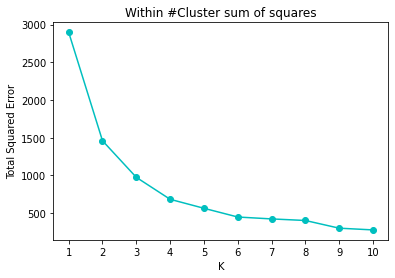

1 loop, best of 3: 1.79 s per loop


In [ ]:
%timeit wcss(group,10)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_

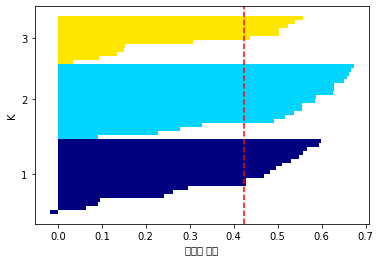

In [ ]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(x, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()

k= 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(group)
plotSilhouette(group, y_km)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def convertColor(x):   # 클러스터별 색상 지정
   color = 'r'
   if x == 1.0: color = 'g'
   elif x == 2.0: color = 'b'
   return color

def convertMarker(x):   # 클러스터별 마커 지정
   marker = 'v'
   if x == 1.0: marker = '*'
   elif x == 2.0: marker = 'o'
   return marker

# R	Player	Name	Club	Age	Main position	Apps	Mins	Goals	Assists	Shot per Game	Key Pass	Drb	Fouled	Rating
X = group[["Goals", "Assists", "Drb"]]

km = KMeans(n_clusters=3, random_state=2008010000)
# km.fit_predict(X)
km.fit(X)

print(km.labels_)             # 군집
print(km.cluster_centers_)    # 중심점

df = pd.DataFrame(X, columns=['Goals', 'Assists','Drb'])
labels = pd.Series(km.labels_, dtype="category")
# labels=labels.cat.rename_categories(["group1","group2","group3"])
df['Cluster'] = labels
df['Color'] = df['Cluster'].apply(lambda x: convertColor(x))
df['Marker'] = df['Cluster'].apply(lambda x: convertMarker(x))
df['Group'] = labels.cat.rename_categories(["group1","group2","group3"])

df.head(10)

[1 1 1 1 1 2 1 2 2 0 1 2 0 2 2 1 1 1 2 0 0 0 2 2 1 1 0 1 0 1 0 1 0 0 1 0 0
 0 2 0 1 0 0 1 0 2 0 2 0 1]
[[ 4.68421053  2.94736842  1.97368421]
 [16.21052632  5.31578947  2.        ]
 [ 6.75       11.5         1.975     ]]


,Goals,Assists,Drb,Cluster,Color,Marker,Group
0,19,12,5.4,1,g,*,group2
1,13,6,6.0,1,g,*,group2
2,25,3,2.1,1,g,*,group2
3,18,5,2.8,1,g,*,group2
4,15,5,2.6,1,g,*,group2
5,8,16,1.4,2,b,o,group3
6,21,3,1.8,1,g,*,group2
7,14,15,2.6,2,b,o,group3
8,8,14,2.6,2,b,o,group3
9,9,4,2.3,0,r,v,group1


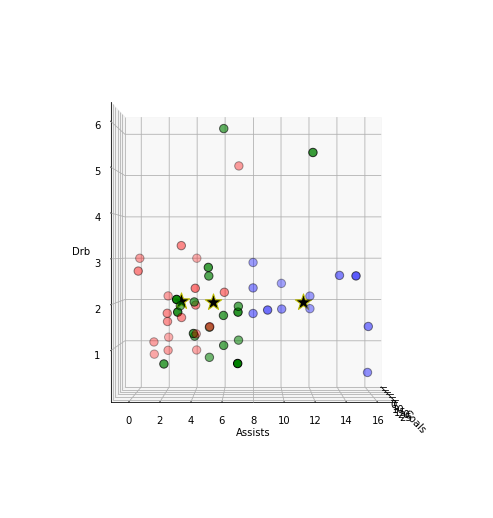

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)  # elev : 위아래
x = np.array(df['Goals'])
y = np.array(df['Assists'])
z = np.array(df['Drb'])

ax.scatter(x,y,z, c=df["Color"], s=70, edgecolor='k')
ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Drb')

for a,b,c in km.cluster_centers_:
  ax.scatter(a,b,c, c='k', s=300, marker='*', edgecolor='y')

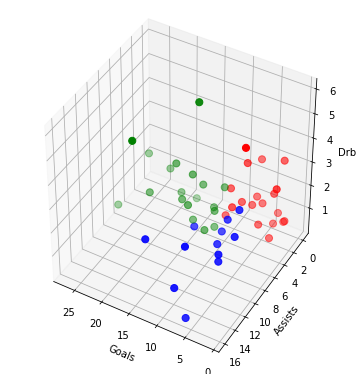

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=120)
x = np.array(df['Goals'])
y = np.array(df['Assists'])
z = np.array(df['Drb'])

ax.scatter(x,y,z, marker="o", c=df["Color"], s=50, cmap="RdBu")  

ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Drb')

plt.show()